In [1]:
#Import all libraries
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#get image file
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
daisy_path = os.path.join(data_dir, 'daisy/')
dandelion_path = os.path.join(data_dir, 'dandelion/')
roses_path = os.path.join(data_dir, 'roses/')
sunflowers_path = os.path.join(data_dir, 'sunflowers/')
tulips_path = os.path.join(data_dir, 'tulips/')

#Dataprep for training
image_datagen = ImageDataGenerator(rescale=1/255.)
train_gen = image_datagen.flow_from_directory(data_dir,
                                              target_size=(150, 150),
                                              batch_size=32,
                                              class_mode='categorical')
#Define Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
history = model.fit(train_gen,  epochs=10)

228818944/228813984 [==============================] - 1s 0us/step
Found 3670 images belonging to 5 classes.
Epoch 1/10
115/115 [==============================] - 18s 92ms/step - loss: 4.8422 - accuracy: 0.3385
Epoch 2/10
115/115 [==============================] - 11s 94ms/step - loss: 1.0943 - accuracy: 0.5734
Epoch 3/10
115/115 [==============================] - 11s 93ms/step - loss: 0.9237 - accuracy: 0.6478
Epoch 4/10
115/115 [==============================] - 11s 94ms/step - loss: 0.7060 - accuracy: 0.7387
Epoch 5/10
115/115 [==============================] - 11s 92ms/step - loss: 0.5448 - accuracy: 0.8174
Epoch 6/10
115/115 [==============================] - 11s 92ms/step - loss: 0.3889 - accuracy: 0.8718
Epoch 7/10
115/115 [==============================] - 11s 91ms/step - loss: 0.2907 - accuracy: 0.9070
Epoch 8/10
115/115 [==============================] - 11s 92ms/step - loss: 0.1975 - accuracy: 0.9355
Epoch 9/10
115/115 [==============================] - 11s 92ms/step - loss:

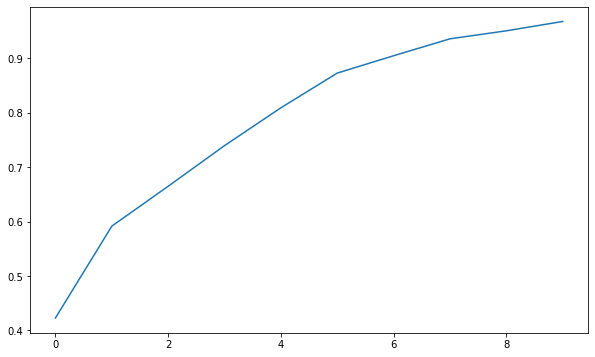

In [6]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])

In [8]:
model.save('basic_CNN_model', overwrite=True)

INFO:tensorflow:Assets written to: basic_CNN_model/assets


In [16]:
#Prediction
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('cnn_saved_model')
class_indc = {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
indc = dict((value, index) for (index, value) in class_indc.items())

def prepare_image(file):
    img_rsz = image.load_img(file, target_size=(150, 150))
    img_array = image.img_to_array(img_rsz)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array/255.
img = prepare_image('test_daisy.jpg')
print("Provided Image is: ", indc[model.predict_classes(img)[0]])

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}